# 画像解析の基礎

## パッケージの読み込み

In [68]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
import cv2

## 平滑化

### オリジナル

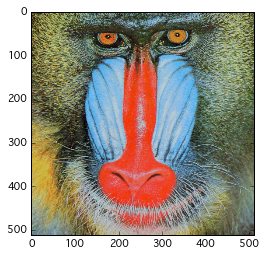

In [7]:
src = cv2.imread("./dataset/standard_test_images/mandril_color.tif", cv2.IMREAD_UNCHANGED)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))

### 単純平滑化
窓（ksize = (height, width)）の範囲内を平均化する．
例えば，ksize=(3,3)ならば以下のフィルタをすべての画素値（とその周辺）に適用する．
$$K = \frac{1}{9} \left(
\begin{array}{ccc}
 1 & 1 & 1 \\
 1 & 1 & 1 \\
 1 & 1 & 1 \\
\end{array}
\right)$$

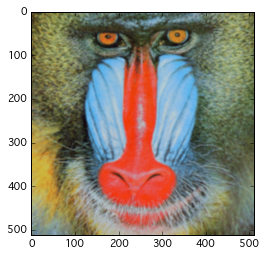

In [19]:
dstBlur = cv2.blur(src, ksize = (5,5))
plt.imshow(cv2.cvtColor(dstBlur, cv2.COLOR_BGR2RGB))

### ガウシアンフィルタ
ksizeは窓のサイズ．  
GaussianカーネルのパラメータsimgaX及びsigmaYを指定できる．

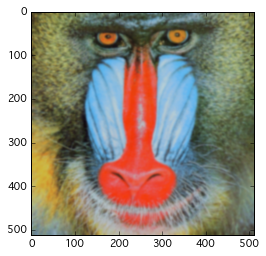

In [55]:
# sigmaXだけを設定するとsigmaYも同様の値と仮定する（等方的）
dstGaussian = cv2.GaussianBlur(src, ksize = (101,101), sigmaX=2)
plt.imshow(cv2.cvtColor(dstGaussian, cv2.COLOR_BGR2RGB))

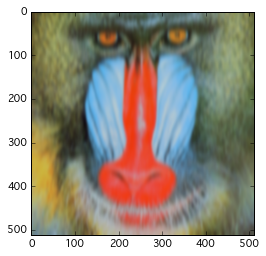

In [61]:
# 非等方的なフィルタ
dstGaussian = cv2.GaussianBlur(src, ksize = (101,101), sigmaX=2, sigmaY=6)
plt.imshow(cv2.cvtColor(dstGaussian, cv2.COLOR_BGR2RGB))

### バイラテラル平滑化
中央ピクセルからの輝度と空間的距離に基づき加重平均をとる（ガウシアンフィルタでは空間的距離だけに基づき加重平均を取る）．  
これによりエッヂの情報を保持する．

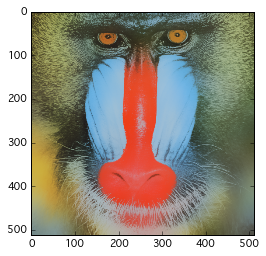

In [67]:
# sigmaXだけを設定するとsigmaYも同様の値と仮定する（等方的）
dstBilateral = cv2.bilateralFilter(src, d = 50, sigmaColor=100, sigmaSpace=25)
plt.imshow(cv2.cvtColor(dstBilateral, cv2.COLOR_BGR2RGB))

## モルフォロジ mathematical morphology
主に2値画像への操作として利用される（グレイスケール画像にも利用されることもある）．   
Matheronのフィルタ定理により，様々なフィルタが少数の基本変換の組み合わせで構成できる点がここでの特徴．  
元々は鉱石のテクスチャ解析用に開発された．

### 膨張　dilation
$$ dst(x,y) = \max_{(x',y')\neq (0,0) } src(x+x', y+y')$$ 

### 収縮 erosion

### 開核　opening

### 閉核 closing

## スケールスペース

## 閾値

## 各種フィルタ

## 距離変換

 ## 輪郭検出

## 背景除去

## 領域分割とマスク

## 例